In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from matplotlib import pyplot as plt

# Basis Functions and Feature Engineering

## Linear in Which Sense?

**We are training linear models in the form:**

$$
f(x; \theta) = \theta_0 + \sum_{j=1}^n \theta_j x_j
$$

* Where $x_j$ is the $j$-th input attribute
* ...$\theta_j$ is the corresponding weight, $\theta_0$ is the intercept


**However, we originally introduced linear models in this form:**

$$
f(x; \theta) = \sum_{i=1}^n \theta_j \phi_j(x)
$$

Where $\phi_j(x)$ is any so called _feature_

## Feature Engineering

**The original formulation:**

$$
f(x; \theta) = \sum_{i=1}^n \theta_j \phi_j(x)
$$

* Implies that we can pre-compute any _function of the input attributes_
* ...And the consider a linear combination of those

The approach is still technically Linear Regression

**We can thing of this process as building new attributes**

* Since attributes are also referred to as "features"
* The technique is known as _feature engineering_

It works with _any kind of ML model_

## Why Engineering Features?

**By using basis functions we can exploit non-linear dependencies**

Let's load again the data for our Taiwan real estate problem

In [2]:
data = pd.read_csv(os.path.join('..', 'data', 'real_estate.csv'), sep=',')
cols = data.columns
X = data[cols[:-1]]
y = np.log(data[cols[-1]])
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.34, random_state=42)

Let's recall what the input attributes are:

In [3]:
X_tr.columns

Index(['house age', 'dist to MRT', '#stores', 'latitude', 'longitude'], dtype='object')

## Why Engineering Features?

**Let's build a scatter plot between "longitude" and the target**

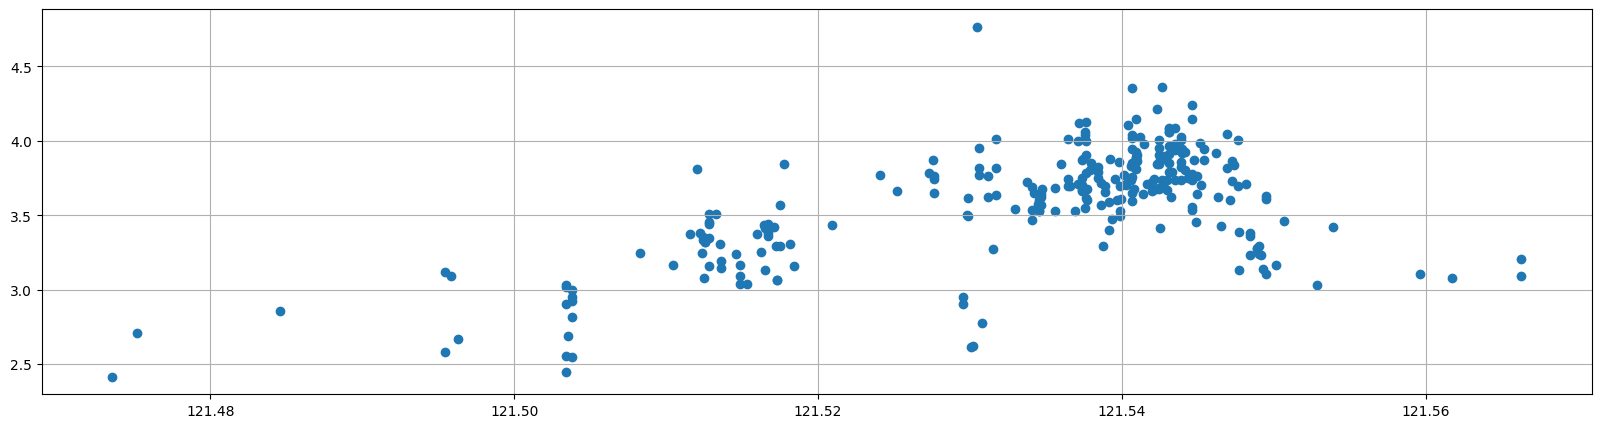

In [6]:
plt.figure(figsize=(20, 5))
plt.scatter(X_tr['longitude'], y_tr)
plt.grid(':')

There is clearly a dependency, but it is non-linear

## Why Engineering Features?

**...But we can linearize the dependency by applying a custom function**

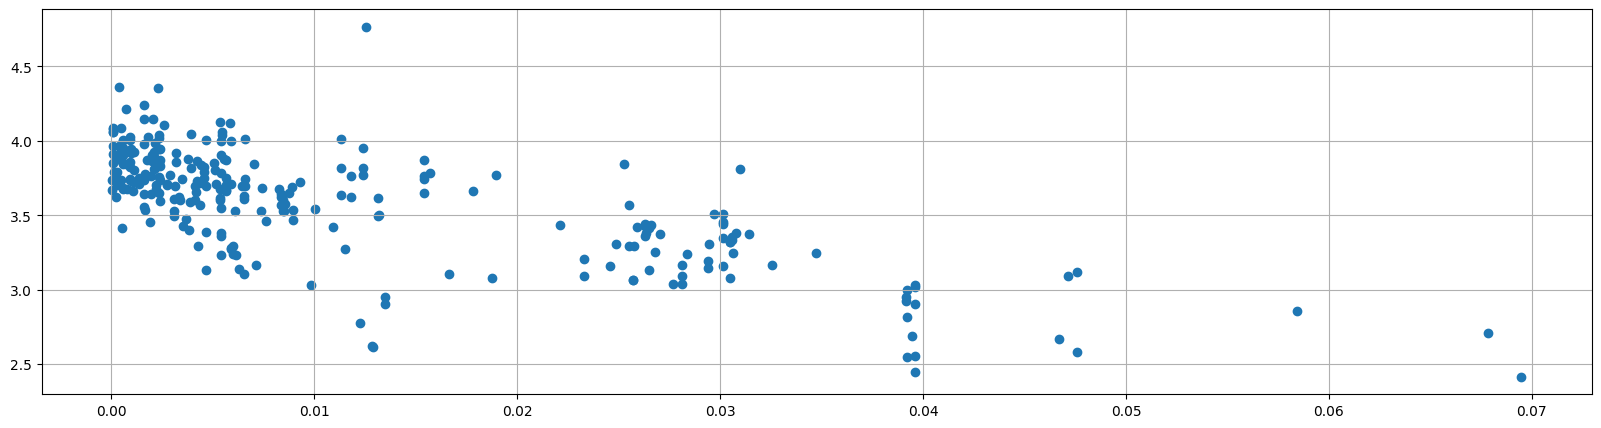

In [8]:
plt.figure(figsize=(20, 5))
plt.scatter(np.abs(X_tr['longitude']-121.543), y_tr)
plt.grid(':')

* In theory, we could do the same with any other input attributes
* ...But for this dataset there are no other clear-cut cases

## Empirical Evaluation

**In our example, the technique enables a modest accuracy gain**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

m = LinearRegression()
m.fit(X_tr, y_tr)
y_pred_tr, y_pred_ts = m.predict(X_tr), m.predict(X_ts)
print(f'Original -- R2: {r2_score(y_tr, y_pred_tr):.3} (training), {r2_score(y_ts, y_pred_ts):.3} (test)')

X_tr2, X_ts2 = X_tr.copy(), X_ts.copy()
X_tr2['longitude'] = np.abs(X_tr2['longitude']-121.543)
X_ts2['longitude'] = np.abs(X_ts2['longitude']-121.543)

m2 = LinearRegression()
m2.fit(X_tr2, y_tr)
y_pred_tr2, y_pred_ts2 = m2.predict(X_tr2), m2.predict(X_ts2)
print(f'New feature -- R2: {r2_score(y_tr, y_pred_tr2):.3} (training), {r2_score(y_ts, y_pred_ts2):.3} (test)')

Original -- R2: 0.691 (training), 0.645 (test)
New feature -- R2: 0.694 (training), 0.647 (test)
